<a href="https://colab.research.google.com/github/Mariam-Elbishbeashy/Healthcare-Classification-ML/blob/main/HealthCareTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/healthcare/students_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
df.shape


(55500, 16)

In [227]:
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1.0,Bobby JacksOn,30.0,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328.0,Urgent,2/2/2024,Paracetamol,Normal
1,2.0,LesLie TErRy,62.0,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,3.0,DaNnY sMitH,76.0,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205.0,Emergency,10/7/2022,Aspirin,Normal
3,4.0,andrEw waTtS,28.0,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450.0,Elective,12/18/2020,Ibuprofen,Abnormal
4,5.0,adrIENNE bEll,43.0,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,10/9/2022,Penicillin,Abnormal


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  float64
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  float64
 3   Gender              50000 non-null  object 
 4   Blood Type          50000 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              50000 non-null  object 
 8   Hospital            50000 non-null  object 
 9   Insurance Provider  50000 non-null  object 
 10  Billing Amount      50000 non-null  float64
 11  Room Number         50000 non-null  float64
 12  Admission Type      50000 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

In [229]:
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("*"*40)

Streaming output truncated to the last 5000 lines.
Lopez Moon and Raymond,                 1
PLC Gill                                1
Wong-Davis                              1
Cook-Gilbert                            1
Hayes-Hernandez                         1
Johnson-Dean                            1
Robinson-Kelly                          1
York and Bryant, Smith                  1
Group Haley                             1
Terrell-Evans                           1
Huynh-White                             1
Brown-Petty                             1
Silva Inc                               1
Reyes-Navarro                           1
Frank-Reyes                             1
Cook, and Rodgers Reyes                 1
Hawkins-Richards                        1
Chambers Andrews and Ross,              1
and Williams, Hoover Maldonado          1
Garcia, Ross Simpson and                1
Washington-Butler                       1
Robinson, and Porter Lopez              1
Walker and Jones, Martin 

In [230]:
# Set pandas to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Show number of missing values for all 16 features
print(df.isnull().sum())

ID                    5500
Name                  5500
Age                   5500
Gender                5500
Blood Type            5500
Medical Condition     5500
Date of Admission     5500
Doctor                5500
Hospital              5500
Insurance Provider    5500
Billing Amount        5500
Room Number           5500
Admission Type        5500
Discharge Date        5500
Medication            5500
Test Results          5500
dtype: int64


In [231]:
# Drop rows where ALL values are null (entire row is empty)
df = df.dropna(how='all')

# Verify the new shape (should be 50,000 rows now)
print("New shape after dropping null rows:", df.shape)  # Expected: (50000, 16)

# Confirm no fully null rows remain
print("\nNull counts after cleaning:")
print(df.isnull().sum())

New shape after dropping null rows: (50000, 16)

Null counts after cleaning:
ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [232]:
(df.isnull().sum()/df.shape[0])*100

,0
ID,0.0
Name,0.0
Age,0.0
Gender,0.0
Blood Type,0.0
Medical Condition,0.0
Date of Admission,0.0
Doctor,0.0
Hospital,0.0
Insurance Provider,0.0


In [233]:
df = df.drop(['ID'], axis=1)


In [234]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [235]:
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_rows)

Rows with missing values:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


In [236]:
print("Percentage of missing values per column:")
print((df.isnull().mean() * 100).round(2))

Percentage of missing values per column:
Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


In [237]:
# Capitalize properly for consistency
df['Name'] = df['Name'].str.title()
df['Doctor'] = df['Doctor'].str.title()
df['Hospital'] = df['Hospital'].str.title()


In [238]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30.0,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons And Miller,Blue Cross,18856.28131,328.0,Urgent,2/2/2024,Paracetamol,Normal
1,Leslie Terry,62.0,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,Danny Smith,76.0,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook Plc,Aetna,27955.09608,205.0,Emergency,10/7/2022,Aspirin,Normal
3,Andrew Watts,28.0,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78241,450.0,Elective,12/18/2020,Ibuprofen,Abnormal
4,Adrienne Bell,43.0,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,10/9/2022,Penicillin,Abnormal


In [239]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [240]:
import numpy as np

# Assuming 'df' is your DataFrame after cleaning as shown in the previous code
# ... (Your previous code to load and clean the DataFrame)

def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# Select numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
  outliers = detect_outliers_iqr(df[col])
  if outliers:
    print(f"Outliers in column '{col}': {outliers}")
    print(f"Number of outliers: {len(outliers)}")
    # You can choose how to handle these outliers:
    # 1. Remove them: df = df[~df[col].isin(outliers)]
    # 2. Replace with median or mean: df[col] = np.where(df[col].isin(outliers), df[col].median(), df[col])
    # 3. Cap them at the upper/lower bounds
    # ...
  else:
    print(f"No outliers detected in column '{col}'")


No outliers detected in column 'Age'
No outliers detected in column 'Billing Amount'
No outliers detected in column 'Room Number'


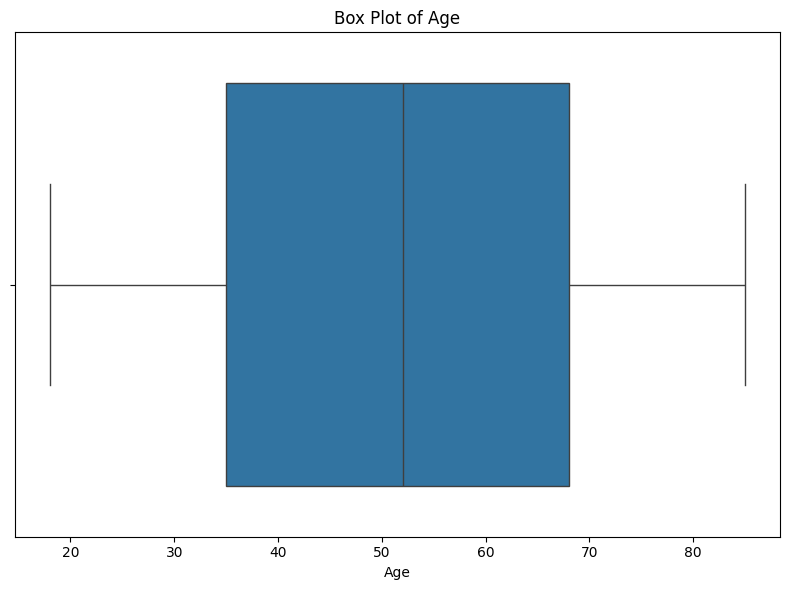

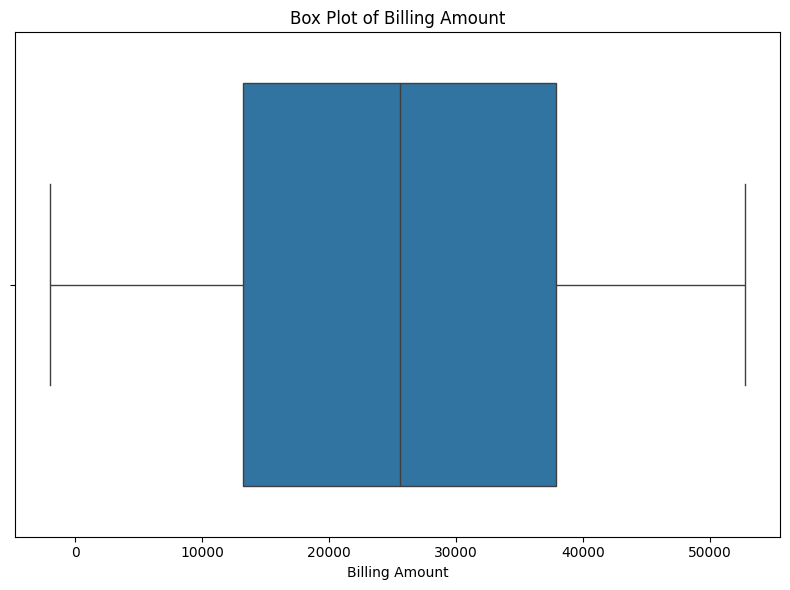

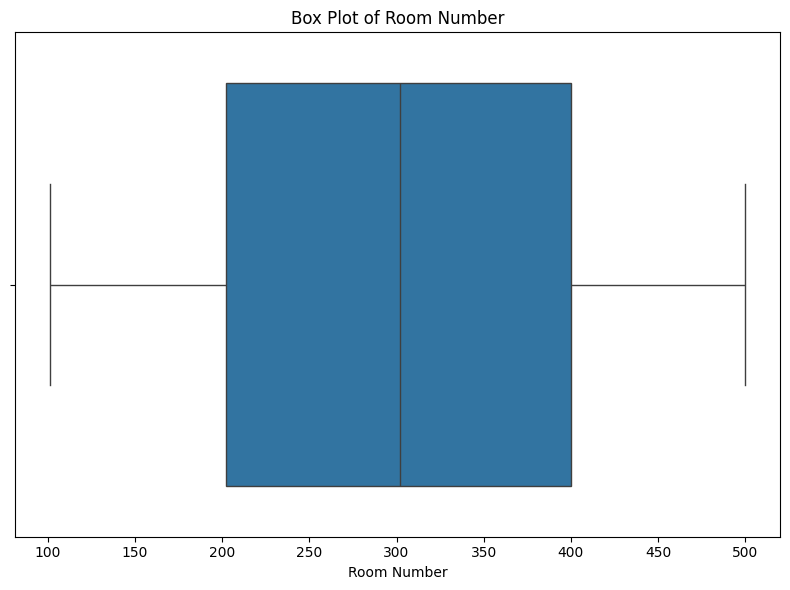

In [241]:
# Ensure numerical_cols is defined
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Box plot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [242]:
# Check unique values in object columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}\n")

# Check for invalid age
print(df[df['Age'] < 0])

# Check for missing or odd values in Billing Amount
print(df['Billing Amount'].describe())


Name: ['Bobby Jackson' 'Leslie Terry' 'Danny Smith' ... 'Lisa Simpson'
 'Roger Farrell' 'Katherine Webster']

Gender: ['Male' 'Female']

Blood Type: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Medical Condition: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Date of Admission: ['1/31/2024' '8/20/2019' '9/22/2022' ... '5/31/2019' '10/12/2023'
 '3/14/2021']

Doctor: ['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']

Hospital: ['Sons And Miller' 'Kim Inc' 'Cook Plc' ... 'Guzman Jones And Graves,'
 'And Williams, Brown Mckenzie' 'Moreno Murphy, Griffith And']

Insurance Provider: ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

Admission Type: ['Urgent' 'Emergency' 'Elective']

Discharge Date: ['2/2/2024' '8/26/2019' '10/7/2022' ... '5/9/2019' '5/31/2024' '6/6/2024']

Medication: ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

Test Results: ['Normal' 'Inconclusive' 'Abnormal']

Empty Dat

In [243]:
print(f"Number of Billing Amount values below 0: {(df['Billing Amount'] < 0).sum()}")

Number of Billing Amount values below 0: 96


In [244]:
df[df['Billing Amount'] < 0].head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
132,Ashley Erickson,32.0,Female,AB-,Cancer,11/5/2019,Gerald Hooper,"And Johnson Moore, Branch",Aetna,-502.507813,376.0,Urgent,11/23/2019,Penicillin,Normal
799,Christopher Weiss,49.0,Female,AB-,Asthma,2/16/2023,Kelly Thompson,Hunter-Hughes,Aetna,-1018.245371,204.0,Elective,3/9/2023,Penicillin,Inconclusive
1018,Ashley Warner,60.0,Male,A+,Hypertension,12/21/2021,Andrea Bentley,"And Wagner, Lee Klein",Aetna,-306.364925,426.0,Elective,1/11/2022,Ibuprofen,Normal
1421,Jay Galloway,74.0,Female,O+,Asthma,1/20/2021,Debra Everett,Group Peters,Blue Cross,-109.097122,381.0,Emergency,2/9/2021,Ibuprofen,Abnormal
2103,Joshua Williamson,72.0,Female,B-,Diabetes,3/21/2021,Wendy Ramos,"And Huff Reeves, Dennis",Blue Cross,-576.727907,369.0,Urgent,4/17/2021,Aspirin,Abnormal


In [245]:
negative_billing = df[df['Billing Amount'] < 0]['Billing Amount']
mean_negative = negative_billing.mean()
min_negative = negative_billing.min()
max_negative = negative_billing.max()

print(f"Mean of negative billing amounts: {mean_negative}")
print(f"Min of negative billing amounts: {min_negative}")
print(f"Max of negative billing amounts: {max_negative}")


Mean of negative billing amounts: -496.3582432560417
Min of negative billing amounts: -2008.49214
Max of negative billing amounts: -23.86672915


In [246]:
# # Calculate median of non-negative billing amounts
# median_billing = df[df['Billing Amount'] >= 0]['Billing Amount'].median()

# # Replace negative billing amounts with the median
# df.loc[df['Billing Amount'] < 0, 'Billing Amount'] = median_billing


In [247]:
# prompt: all negative bulling amounts turn it positive

# Assuming 'df' is your DataFrame after cleaning as shown in the previous code
# ... (Your previous code to load and clean the DataFrame)


# Convert negative billing amounts to positive
df['Billing Amount'] = df['Billing Amount'].abs()


In [248]:
# Check for missing or odd values in Billing Amount
print(df['Billing Amount'].describe())

count    50000.000000
mean     25557.597572
std      14212.505232
min          9.238787
25%      13239.403090
50%      25541.302835
75%      37853.996817
max      52764.276740
Name: Billing Amount, dtype: float64


In [249]:
print(df.head())
df.shape

            Name   Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson  30.0    Male         B-            Cancer         1/31/2024   
1   Leslie Terry  62.0    Male         A+           Obesity         8/20/2019   
2    Danny Smith  76.0  Female         A-           Obesity         9/22/2022   
3   Andrew Watts  28.0  Female         O+          Diabetes        11/18/2020   
4  Adrienne Bell  43.0  Female        AB+            Cancer         9/19/2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons And Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook Plc              Aetna   
3       Kevin Wells  Hernandez Rogers And Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.281

(50000, 15)

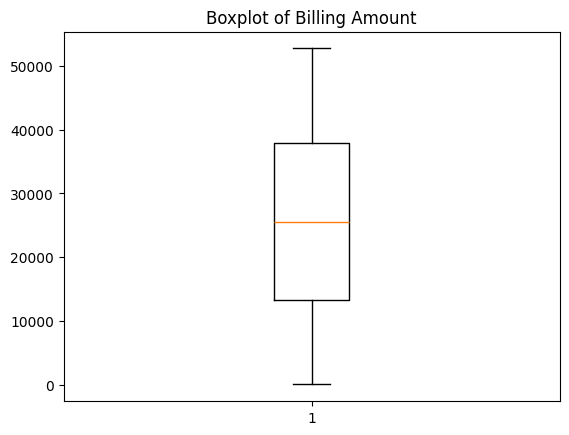

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.boxplot(df['Billing Amount'])
plt.title('Boxplot of Billing Amount')
plt.show()

In [251]:
count_below_50 = (df['Billing Amount'] < 50).sum()
print(f"Number of Billing Amount values below 50: {count_below_50}")

count_below_500 = (df['Billing Amount'] < 500).sum()
print(f"Number of Billing Amount values below 500: {count_below_500}")

count_below_10000 = (df['Billing Amount'] < 10000).sum()
print(f"Number of Billing Amount values below 10000: {count_below_10000}")


Number of Billing Amount values below 50: 16
Number of Billing Amount values below 500: 170
Number of Billing Amount values below 10000: 9214


In [252]:
# Calculate median
median = df['Billing Amount'].median()

# Calculate Median Absolute Deviation (MAD)
mad = np.median(np.abs(df['Billing Amount'] - median))

# Calculate Modified Z-Score
# 0.6745 is a constant to make MAD comparable to standard deviation in a normal distribution
modified_z_scores = 0.6745 * (df['Billing Amount'] - median) / mad

# Identify outliers (threshold of 3.5 is common for Modified Z-Score)
outliers = df[np.abs(modified_z_scores) > 3.5]

# Print the number of outliers and their values
print(f"Number of outliers: {len(outliers)}")
print(outliers[['Billing Amount']])

Number of outliers: 0
Empty DataFrame
Columns: [Billing Amount]
Index: []


Number of values below threshold (100): 37
       Billing Amount
20          42.514589
1834        49.450117
6096        86.133707
6961        43.098522
7308        53.256978
7776        98.867320
9533        51.330481
9790        38.969643
10129       46.803365
13178       96.001851
13937       90.829943
14029       32.626843
14092       75.819451
14163       77.535113
14534       26.112523
15298       23.727930
18220       68.909747
21275       32.348729
21625       99.933579
25907       68.319621
27198       43.291748
27649       53.832086
30154       64.479360
30618       75.620194
30894       90.078901
32873       23.866729
34304       38.966152
37816       37.267748
38058        9.238787
40806       94.218497
41078       97.853117
42258       85.475708
42451       31.030955
43782       53.931445
44565       36.217270
45255       61.442511
46987       82.765823


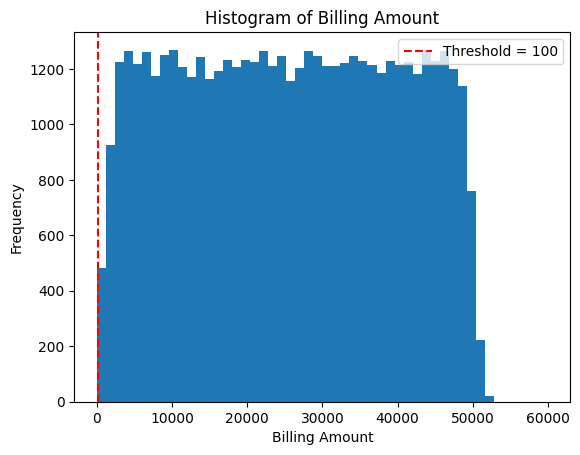

In [253]:

# Set a domain-specific threshold (e.g., 100 as a plausible minimum billing amount)
threshold = 100
potential_outliers = df[df['Billing Amount'] < threshold]

# Print number and values of potential outliers
print(f"Number of values below threshold ({threshold}): {len(potential_outliers)}")
print(potential_outliers[['Billing Amount']])

# Visualize with a histogram
plt.hist(df['Billing Amount'], bins=50, range=(0, 60000))
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Histogram of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [254]:
df[df['Billing Amount'] < 1000]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
20,Timothy Burns,67.0,Female,A-,Asthma,6/28/2023,Krista Smith,Jones Llc,Blue Cross,42.514589,115.0,Elective,7/2/2023,Aspirin,Normal
132,Ashley Erickson,32.0,Female,AB-,Cancer,11/5/2019,Gerald Hooper,"And Johnson Moore, Branch",Aetna,502.507813,376.0,Urgent,11/23/2019,Penicillin,Normal
312,Angel Randolph Dds,74.0,Female,A+,Asthma,7/6/2023,Ann Brown,"White Wilson And Farmer,",UnitedHealthcare,386.054055,165.0,Elective,8/3/2023,Aspirin,Normal
1018,Ashley Warner,60.0,Male,A+,Hypertension,12/21/2021,Andrea Bentley,"And Wagner, Lee Klein",Aetna,306.364925,426.0,Elective,1/11/2022,Ibuprofen,Normal
1134,Cynthia Bryant,70.0,Male,A+,Hypertension,12/9/2021,Nicole Weaver,"Pearson, Carroll And Lane",Medicare,943.116533,469.0,Elective,1/8/2022,Lipitor,Abnormal
1421,Jay Galloway,74.0,Female,O+,Asthma,1/20/2021,Debra Everett,Group Peters,Blue Cross,109.097122,381.0,Emergency,2/9/2021,Ibuprofen,Abnormal
1450,Timothy Meadows,80.0,Male,O-,Cancer,3/15/2023,Brenda Ramsey,"And Webb Robinson, Hicks",Blue Cross,752.032899,361.0,Urgent,4/14/2023,Aspirin,Abnormal
1834,Kristie Vasquez,59.0,Male,B-,Arthritis,7/28/2022,Jared Prince,"Rowe, Stone And Patterson",Aetna,49.450117,140.0,Urgent,8/13/2022,Lipitor,Abnormal
1842,Angela Brown,21.0,Male,O-,Hypertension,4/28/2023,Maurice Dunn,White Group,UnitedHealthcare,671.125230,267.0,Urgent,5/12/2023,Aspirin,Inconclusive
1847,Joseph Figueroa,50.0,Female,B-,Hypertension,10/21/2023,Edward Burgess,"And Perez, Graham Herrera",Blue Cross,700.595076,481.0,Urgent,10/24/2023,Aspirin,Normal


In [255]:
# Check how many values have exactly 5 decimals
df['Billing Amount'].astype(str).str.extract(r'\.(\d+)$')[0].str.len().value_counts()


,count
0,
5,37511
6,8019
4,3742
3,347
7,306
2,34
8,33
1,7
9,1


In [256]:
def normalize_billing(value):
    decimals = len(str(value).split('.')[-1]) if '.' in str(value) else 0

    if decimals > 5:
        # Scale it up to reduce decimal places
        factor = 10 ** (decimals - 5)
        return value * factor
    elif decimals < 5:
        # Scale it down to increase decimal precision
        factor = 10 ** (5 - decimals)
        return value / factor
    else:
        return value  # already fine

# Apply fix
df['Billing Amount'] = df['Billing Amount'].abs().apply(normalize_billing)


In [257]:
# Check how many values have exactly 5 decimals
df['Billing Amount'].astype(str).str.extract(r'\.(\d+)$')[0].str.len().value_counts()


,count
0,
5,46585
12,1449
11,955
13,891
14,104
15,13
16,2
4,1


In [258]:
print(df['Billing Amount'].describe())

count    50000.000000
mean     31900.821036
std      19808.226518
min          2.063130
25%      17800.049970
50%      30247.591335
75%      42615.299833
max      99983.284910
Name: Billing Amount, dtype: float64


In [259]:
# Cell: Impute Low Amounts Function and Usage with Dataset
def impute_low_amounts(values, threshold=500, median_valid=None):
    # If median_valid is not provided, calculate it from values above threshold
    if median_valid is None:
        median_valid = values[values >= threshold].median()
        if pd.isna(median_valid):
            median_valid = values.median()  # Fallback to overall median if no valid values

    # Impute values below threshold with the median
    def impute_single_value(x):
        return median_valid if x < threshold else x

    return values.apply(impute_single_value)

# Apply to the dataset
print("Original Billing Amount data:")
print(df['Billing Amount'].describe())

# Apply the imputation to the dataset
df['Billing Amount'] = impute_low_amounts(df['Billing Amount'])

# Verify the results
print("\nImputed Billing Amount data:")
print(df['Billing Amount'].describe())

# Verify the median used
median_used = df['Billing Amount'][df['Billing Amount'] >= threshold].median()
print(f"\nMedian used for imputation: ${median_used}")

Original Billing Amount data:
count    50000.000000
mean     31900.821036
std      19808.226518
min          2.063130
25%      17800.049970
50%      30247.591335
75%      42615.299833
max      99983.284910
Name: Billing Amount, dtype: float64

Imputed Billing Amount data:
count    50000.000000
mean     32152.511451
std      19595.266463
min        504.188560
25%      18213.123253
50%      30446.643790
75%      42615.299833
max      99983.284910
Name: Billing Amount, dtype: float64

Median used for imputation: $30446.64379


In [260]:
print(df['Billing Amount'].describe())

count    50000.000000
mean     32152.511451
std      19595.266463
min        504.188560
25%      18213.123253
50%      30446.643790
75%      42615.299833
max      99983.284910
Name: Billing Amount, dtype: float64


In [261]:
df[df['Billing Amount'] < 100]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


In [262]:
# prompt: display counts of records with billing amounts from: ranges from 1 to 100, 101 to 500, 501 to 1000, 1001 to 5000, 5001 to 10000, 10001 to max

# Assuming 'df' is your DataFrame after all the preprocessing steps

# Define the billing amount ranges
bins = [1, 100, 500, 1000, 5000, 10000, float('inf')]
labels = ['1-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+']

# Cut the 'Billing Amount' column into these ranges
df['Billing_Range'] = pd.cut(df['Billing Amount'], bins=bins, labels=labels, right=False)

# Display the counts for each range
print(df['Billing_Range'].value_counts())


Billing_Range
10001+        45476
1001-5000      3961
5001-10000      518
501-1000         45
101-500           0
1-100             0
Name: count, dtype: int64


In [263]:
df[df['Billing Amount'] < 50]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Billing_Range


In [265]:
# import pandas as pd
# import numpy as np
# import re

# # Load the dataset
# def load_data(file_path):
#     return pd.read_csv(file_path)

# # Function to parse the raw data from the text format you provided
# def parse_raw_data(raw_data_string):
#     pattern = r'\*\*(\d+)\*\*([^0-9]+)(\d+\.\d+)([^0-9]+)([A-Z][+-])([^0-9]+)(\d+/\d+/\d+)([^0-9]+)([^0-9]+)([^0-9]+)(\d+\.\d+)(\d+\.\d+)([^0-9]+)(\d+/\d+/\d+)([^0-9]+)([^0-9]+)'

#     records = []
#     for match in re.finditer(pattern, raw_data_string):
#         patient_id = match.group(1)
#         name = match.group(2).strip()
#         age = float(match.group(3))
#         gender = match.group(4).strip()
#         blood_type = match.group(5)
#         condition = match.group(6).strip()
#         admission_date = match.group(7)
#         doctor = match.group(8).strip()
#         hospital = match.group(9).strip()
#         insurance = match.group(10).strip()
#         billing_amount = float(match.group(11))
#         room_number = match.group(12)
#         admission_type = match.group(13).strip()
#         discharge_date = match.group(14)
#         medication = match.group(15).strip()
#         test_result = match.group(16).strip()

#         records.append({
#             'patient_id': patient_id,
#             'Name': name,
#             'Age': age,
#             'Gender': gender,
#             'Blood Type': blood_type,
#             'Medical Condition': condition,
#             'Date of Admission': admission_date,
#             'Doctor': doctor,
#             'Hospital': hospital,
#             'Insurance Provider': insurance,
#             'Billing Amount': billing_amount,
#             'Room Number': room_number,
#             'Admission Type': admission_type,
#             'Discharge Date': discharge_date,
#             'Medication': medication,
#             'Test Results': test_result
#         })

#     return pd.DataFrame(records)

# # Function to define age groups
# def categorize_age(age):
#     if age < 18:
#         return 'Child'
#     elif age < 41:
#         return 'Young Adult'
#     elif age < 66:
#         return 'Middle Age'
#     else:
#         return 'Senior'

# # Function to define billing range categories
# def categorize_billing_amount(amount):
#     if amount <= 100:
#         return '1-100'
#     elif amount <= 500:
#         return '101-500'
#     elif amount <= 1000:
#         return '501-1000'
#     elif amount <= 5000:
#         return '1001-5000'
#     elif amount <= 10000:
#         return '5001-10000'
#     else:
#         return '10001+'

# # Main imputation function
# def impute_low_billing_amounts(df):
#     df_imputed = df.copy()

#     # Create age group categories
#     df_imputed['age_group'] = df_imputed['Age'].apply(categorize_age)

#     # Create billing range categories
#     df_imputed['billing_range'] = df_imputed['Billing Amount'].apply(categorize_billing_amount)

#     # Identify records with suspiciously low billing amounts (1-100 range)
#     low_billing_mask = df_imputed['Billing Amount'] <= 100
#     suspicious_records = df_imputed[low_billing_mask].copy()

#     # Valid data for calculating medians (excluding suspicious low values)
#     valid_data = df_imputed[~low_billing_mask].copy()

#     # Store original and imputed values for documentation
#     imputation_log = []

#     # Iterate through each suspicious record
#     for idx, record in suspicious_records.iterrows():
#         # Level 1: Most specific - match condition, admission_type, age_group, test_result
#         level1_mask = (
#             (valid_data['Medical Condition'] == record['Medical Condition']) &
#             (valid_data['Admission Type'] == record['Admission Type']) &
#             (valid_data['age_group'] == record['age_group']) &
#             (valid_data['Test Results'] == record['Test Results'])
#         )

#         level1_matches = valid_data[level1_mask]

#         # Level 2: Match condition, admission_type
#         level2_mask = (
#             (valid_data['Medical Condition'] == record['Medical Condition']) &
#             (valid_data['Admission Type'] == record['Admission Type'])
#         )

#         level2_matches = valid_data[level2_mask]

#         # Level 3: Match condition only
#         level3_mask = valid_data['Medical Condition'] == record['Medical Condition']
#         level3_matches = valid_data[level3_mask]

#         # Level 4: Match admission_type only
#         level4_mask = valid_data['Admission Type'] == record['Admission Type']
#         level4_matches = valid_data[level4_mask]

#         # Determine which level to use based on minimum required matches (5)
#         imputation_level = 0
#         imputed_value = None

#         if len(level1_matches) >= 5:
#             imputation_level = 1
#             imputed_value = level1_matches['Billing Amount'].median()
#         elif len(level2_matches) >= 5:
#             imputation_level = 2
#             imputed_value = level2_matches['Billing Amount'].median()
#         elif len(level3_matches) >= 5:
#             imputation_level = 3
#             imputed_value = level3_matches['Billing Amount'].median()
#         elif len(level4_matches) >= 5:
#             imputation_level = 4
#             imputed_value = level4_matches['Billing Amount'].median()
#         else:
#             # If all else fails, use median of all valid data
#             imputation_level = 5
#             imputed_value = valid_data['Billing Amount'].median()

#         # Log the imputation details
#         imputation_log.append({
#             'Name': record['Name'],
#             'Medical Condition': record['Medical Condition'],
#             'Admission Type': record['Admission Type'],
#             'original_amount': record['Billing Amount'],
#             'imputed_amount': imputed_value,
#             'imputation_level': imputation_level
#         })

#         # Update the value in the dataframe
#         df_imputed.loc[idx, 'Billing Amount'] = imputed_value

#         # Update the billing range category
#         df_imputed.loc[idx, 'billing_range'] = categorize_billing_amount(imputed_value)

#     # Create a dataframe from the imputation log
#     imputation_log_df = pd.DataFrame(imputation_log)

#     return df_imputed, imputation_log_df

# # Function to validate results
# def validate_imputation(original_df, imputed_df, log_df):
#     # Create billing range for original_df for comparison
#     original_df_with_range = original_df.copy()
#     original_df_with_range['billing_range'] = original_df_with_range['Billing Amount'].apply(categorize_billing_amount)

#     # Check if any imputed values are still suspiciously low
#     still_suspicious = imputed_df[imputed_df['billing_range'] == '1-100']

#     print(f"Original records with suspicious billing amounts: {sum(original_df_with_range['billing_range'] == '1-100')}")
#     print(f"Records still with suspicious billing amounts after imputation: {len(still_suspicious)}")

#     # Show distribution of imputation levels used
#     level_counts = log_df['imputation_level'].value_counts().sort_index()
#     print("\nImputation levels used:")
#     for level, count in level_counts.items():
#         level_description = {
#             1: "Level 1 (Match Medical Condition, Admission Type, age group, Test Results)",
#             2: "Level 2 (Match Medical Condition, Admission Type)",
#             3: "Level 3 (Match Medical Condition only)",
#             4: "Level 4 (Match Admission Type only)",
#             5: "Level 5 (Overall median)"
#         }
#         print(f"{level_description[level]}: {count} records")

#     # Show before/after statistics
#     print("\nBilling amount statistics before imputation:")
#     print(original_df['Billing Amount'].describe())

#     print("\nBilling amount statistics after imputation:")
#     print(imputed_df['Billing Amount'].describe())

#     # Distribution of billing ranges before/after
#     print("\nBilling range distribution before imputation:")
#     print(original_df_with_range['billing_range'].value_counts().sort_index())

#     print("\nBilling range distribution after imputation:")
#     print(imputed_df['billing_range'].value_counts().sort_index())

#     return still_suspicious

# # Make a copy of original data for comparison
# original_df = df.copy()

# # Run the imputation
# imputed_df, imputation_log = impute_low_billing_amounts(df)

# # Validate the results
# suspicious_after = validate_imputation(original_df, imputed_df, imputation_log)

# # Save results
# imputed_df.to_csv("healthcare_billing_imputed.csv", index=False)
# imputation_log.to_csv("imputation_log.csv", index=False)

# print("\nImputation completed and saved to 'healthcare_billing_imputed.csv'")
# print("Imputation log saved to 'imputation_log.csv'")

# # If there are still suspicious values, print them for manual review
# if len(suspicious_after) > 0:
#     print("\nThe following records still have suspicious billing amounts after imputation:")
#     print(suspicious_after[['patient_id', 'Name', 'Medical Condition', 'Admission Type', 'Billing Amount']])
#     print("Consider reviewing these cases manually.")